In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
housing = datasets.load_boston()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

housing.keys()

In [36]:
data= pd.DataFrame(housing['data'], columns = housing['feature_names'])
target = pd.DataFrame(housing['target'], columns = ['Target'])
print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [37]:
df = pd.concat([data,target], axis=1)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


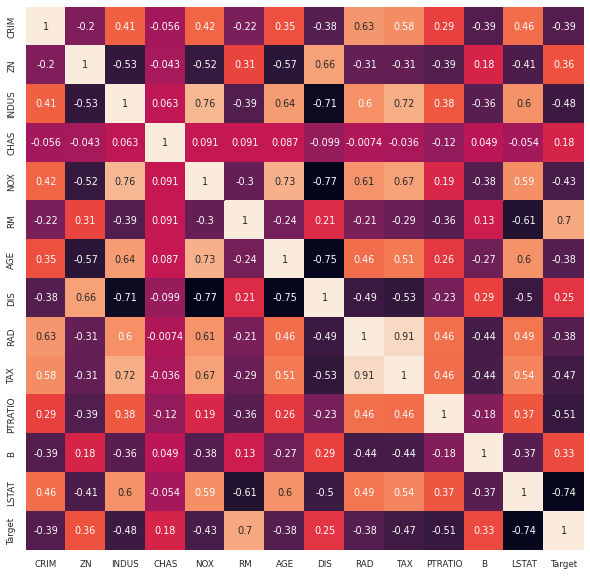

In [38]:
df_corr = df.corr()
plt.figure(figsize=(10,10))
sns.set(font_scale=.8)
sns.heatmap(df_corr, annot=True, cbar = False)
plt.show()

In [45]:
corr_order = df.corr().loc[:'LSTAT','Target'].abs().sort_values(ascending =False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [68]:
plot_cols = ['Target','LSTAT','RM','PTRATIO','INDUS']
# plot_cols = corr_order.index[[:4],]
plot_df = df.loc[:,plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


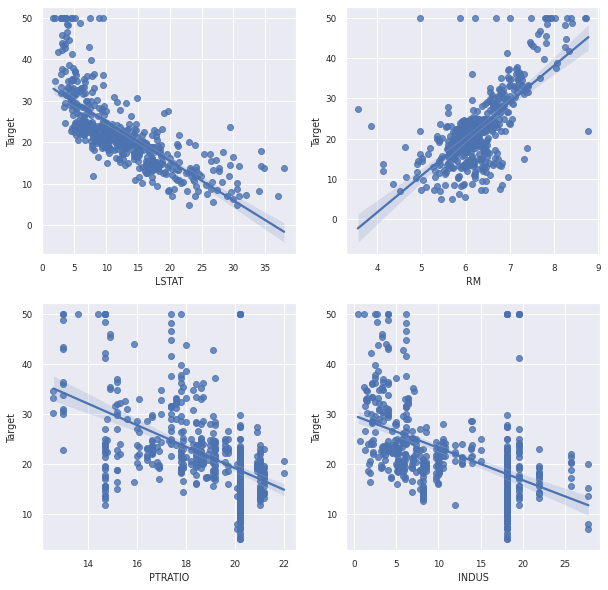

In [70]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  ax1= plt.subplot(2,2, idx+1)
  sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

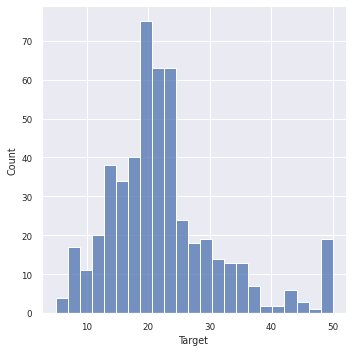

In [73]:
sns.displot(x='Target', kind='hist', data=df)
plt.show()

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)
df.iloc[:,:-1] = df_scaled
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [82]:
from sklearn.model_selection import train_test_split
x_data = df.loc[:,['LSTAT','RM']]
y_data = df.loc[:,'Target']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2, shuffle =True, random_state=12)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(404, 2) (102, 2)
(404,) (102,)


In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print(np.round(lr.coef_,1))
print(np.round(lr.intercept_,1))

[-23.2  25.4]
16.3


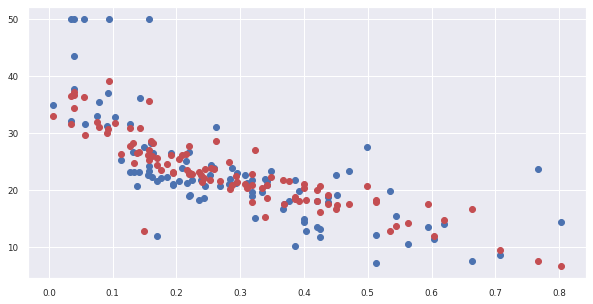

In [97]:
y_test_pred = lr.predict(x_test)
plt.figure(figsize=(10,5))
plt.scatter(x_test['LSTAT'], y_test, label='y_test')
plt.scatter(x_test['LSTAT'], y_test_pred, c='r', label='y_pred')
plt.show()

In [100]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print('%.4f' %train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print('%.4f' %test_mse)


30.8042
29.5065


In [101]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_score = -1 * cross_val_score(lr, x_train, y_train, cv=5, scoring = 'neg_mean_squared_error')
print(np.round(mse_score,4))
print(np.mean(mse_score))

[31.465  34.668  28.9147 29.3535 34.6627]
31.812801523908377


In [105]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print(x_train.shape)
print(x_train_poly.shape)

(404, 2)
(404, 6)


In [124]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print('%.4f'%train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
train_mse = mean_squared_error(y_test, y_test_pred)
print('%.4f'%test_mse)

21.5463
29.5065


In [126]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha = 2.5)
rdg.fit(x_train_poly, y_train)

y_train_pred = rdg.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print(train_mse)

y_test_pred = rdg.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print(test_mse)

25.804757702586976
23.679983784699008


In [127]:
from sklearn.linear_model import Lasso
las = Lasso(alpha = 0.05)
las.fit(x_train_poly, y_train)

y_train_pred = las.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print(train_mse)

y_test_pred = las.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print(test_mse)

22.789061957859097
19.219456745878393


In [129]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 3, random_state=12)
dtr.fit(x_train, y_train)

y_train_pred = dtr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print(train_mse)

y_test_pred = dtr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(test_mse)

18.802883869508115
17.90648054574048


In [130]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth = 3, random_state=12)
rfr.fit(x_train, y_train)

y_train_pred = rfr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print(train_mse)

y_test_pred = rfr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(test_mse)

16.02005482203282
17.775138895365586


In [131]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective = 'reg:squarederror', max_depth = 3, random_state=12)
xgbr.fit(x_train, y_train)

y_train_pred = xgbr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print(train_mse)

y_test_pred = xgbr.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(test_mse)

8.232604305135567
18.03177492971733
